In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

/Users/linzhun/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
data = pd.read_csv('data_multivar.txt',header=None,names=['f1','f2','y'])

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
f1    300 non-null float64
f2    300 non-null float64
y     300 non-null int64
dtypes: float64(2), int64(1)
memory usage: 7.1 KB


In [5]:
data.head()

,f1,f2,y
0,5.35,4.48,0
1,6.72,5.37,0
2,3.57,5.25,0
3,4.77,7.65,1
4,2.25,4.07,1


In [6]:
class_0 = data[data.y == 0]
class_1 = data[data.y == 1]

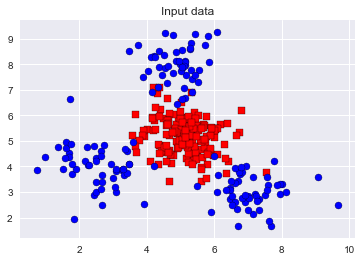

In [7]:
plt.figure()
plt.scatter(class_0.f1, class_0.f2, facecolors='red', edgecolors='black', marker='s')
plt.scatter(class_1.f1, class_1.f2, facecolors='blue', edgecolors='black', marker='o')
plt.title("Input data")
plt.show()

In [8]:
# Train test split and SVM training
from sklearn import cross_validation
from sklearn.svm import SVC

In [9]:
X = data[['f1','f2']]
y = data.y

In [18]:
X.values.min()

0.73999999999999999

In [22]:
def plot_classifier(classifier, X, y, title='Classifier boundaries', annotate=False):
    # define ranges to plot the figure 
    x_min, x_max = X.values.min() - 1.0, X.values.max() + 1.0
    y_min, y_max = y.values.min() - 1.0, y.values.max() + 1.0

    # denotes the step size that will be used in the mesh grid
    step_size = 0.01

    # define the mesh grid
    x_values, y_values = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))

    # compute the classifier output
    mesh_output = classifier.predict(np.c_[x_values.ravel(), y_values.ravel()])

    # reshape the array
    mesh_output = mesh_output.reshape(x_values.shape)

    # Plot the output using a colored plot 
    plt.figure()

    # Set the title
    plt.title(title)

    # choose a color scheme you can find all the options 
    # here: http://matplotlib.org/examples/color/colormaps_reference.html
    plt.pcolormesh(x_values, y_values, mesh_output, cmap=plt.cm.spring)

    # Overlay the training points on the plot 
    plt.scatter(X.f1, X.f2, c=y, s=80, edgecolors='black', linewidth=1, cmap=plt.cm.winter)

    # specify the boundaries of the figure
    plt.xlim(x_values.min(), x_values.max())
    plt.ylim(y_values.min(), y_values.max())

    # specify the ticks on the X and Y axes
    plt.xticks(())
    plt.yticks(())

In [12]:
# Train test split and SVM training
from sklearn import cross_validation
from sklearn.svm import SVC

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

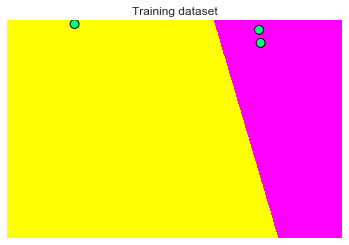

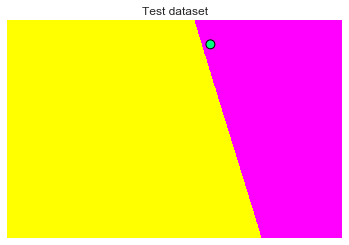

In [23]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.25, random_state=5)

params = {'kernel': 'linear'}
# params = {'kernel': 'poly', 'degree': 3}
# params = {'kernel': 'rbf'}
classifier = SVC(**params)
classifier.fit(X_train,y_train)
plot_classifier(classifier, X_train, y_train, "Training dataset")

y_test_pred = classifier.predict(X_test)
plot_classifier(classifier, X_test, y_test, 'Test dataset')